In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

## basic data visualizations :o :)

In [68]:
# downloading the dataset 
df = pd.read_csv('complete_dataset.csv')
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# df = df[df['date'].apply(lambda x: x.year)==2019].reset_index(drop=True)

In [89]:
df['school_day'] = df['school_day'].apply(lambda x: 1 if x == 'Y' else 0)
df['holiday'] = df['holiday'].apply(lambda x: 1 if x == 'Y' else 0)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('demand', axis=1), df['demand'], test_size=0.33, random_state=42)

In [5]:
train = pd.merge(X_train, y_train, left_index=True, right_index=True)
test = pd.merge(X_test, y_test, left_index=True, right_index=True)

In [6]:
# variable names
df.columns

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')

Text(0.5, 0, 'Demand')

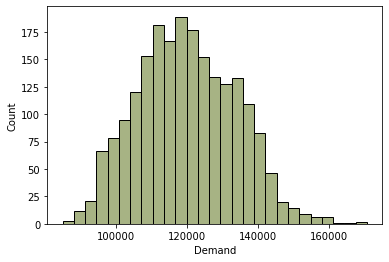

In [7]:
sns.histplot(data=df['demand'], color='#8A9A5B')
plt.xlabel('Demand')

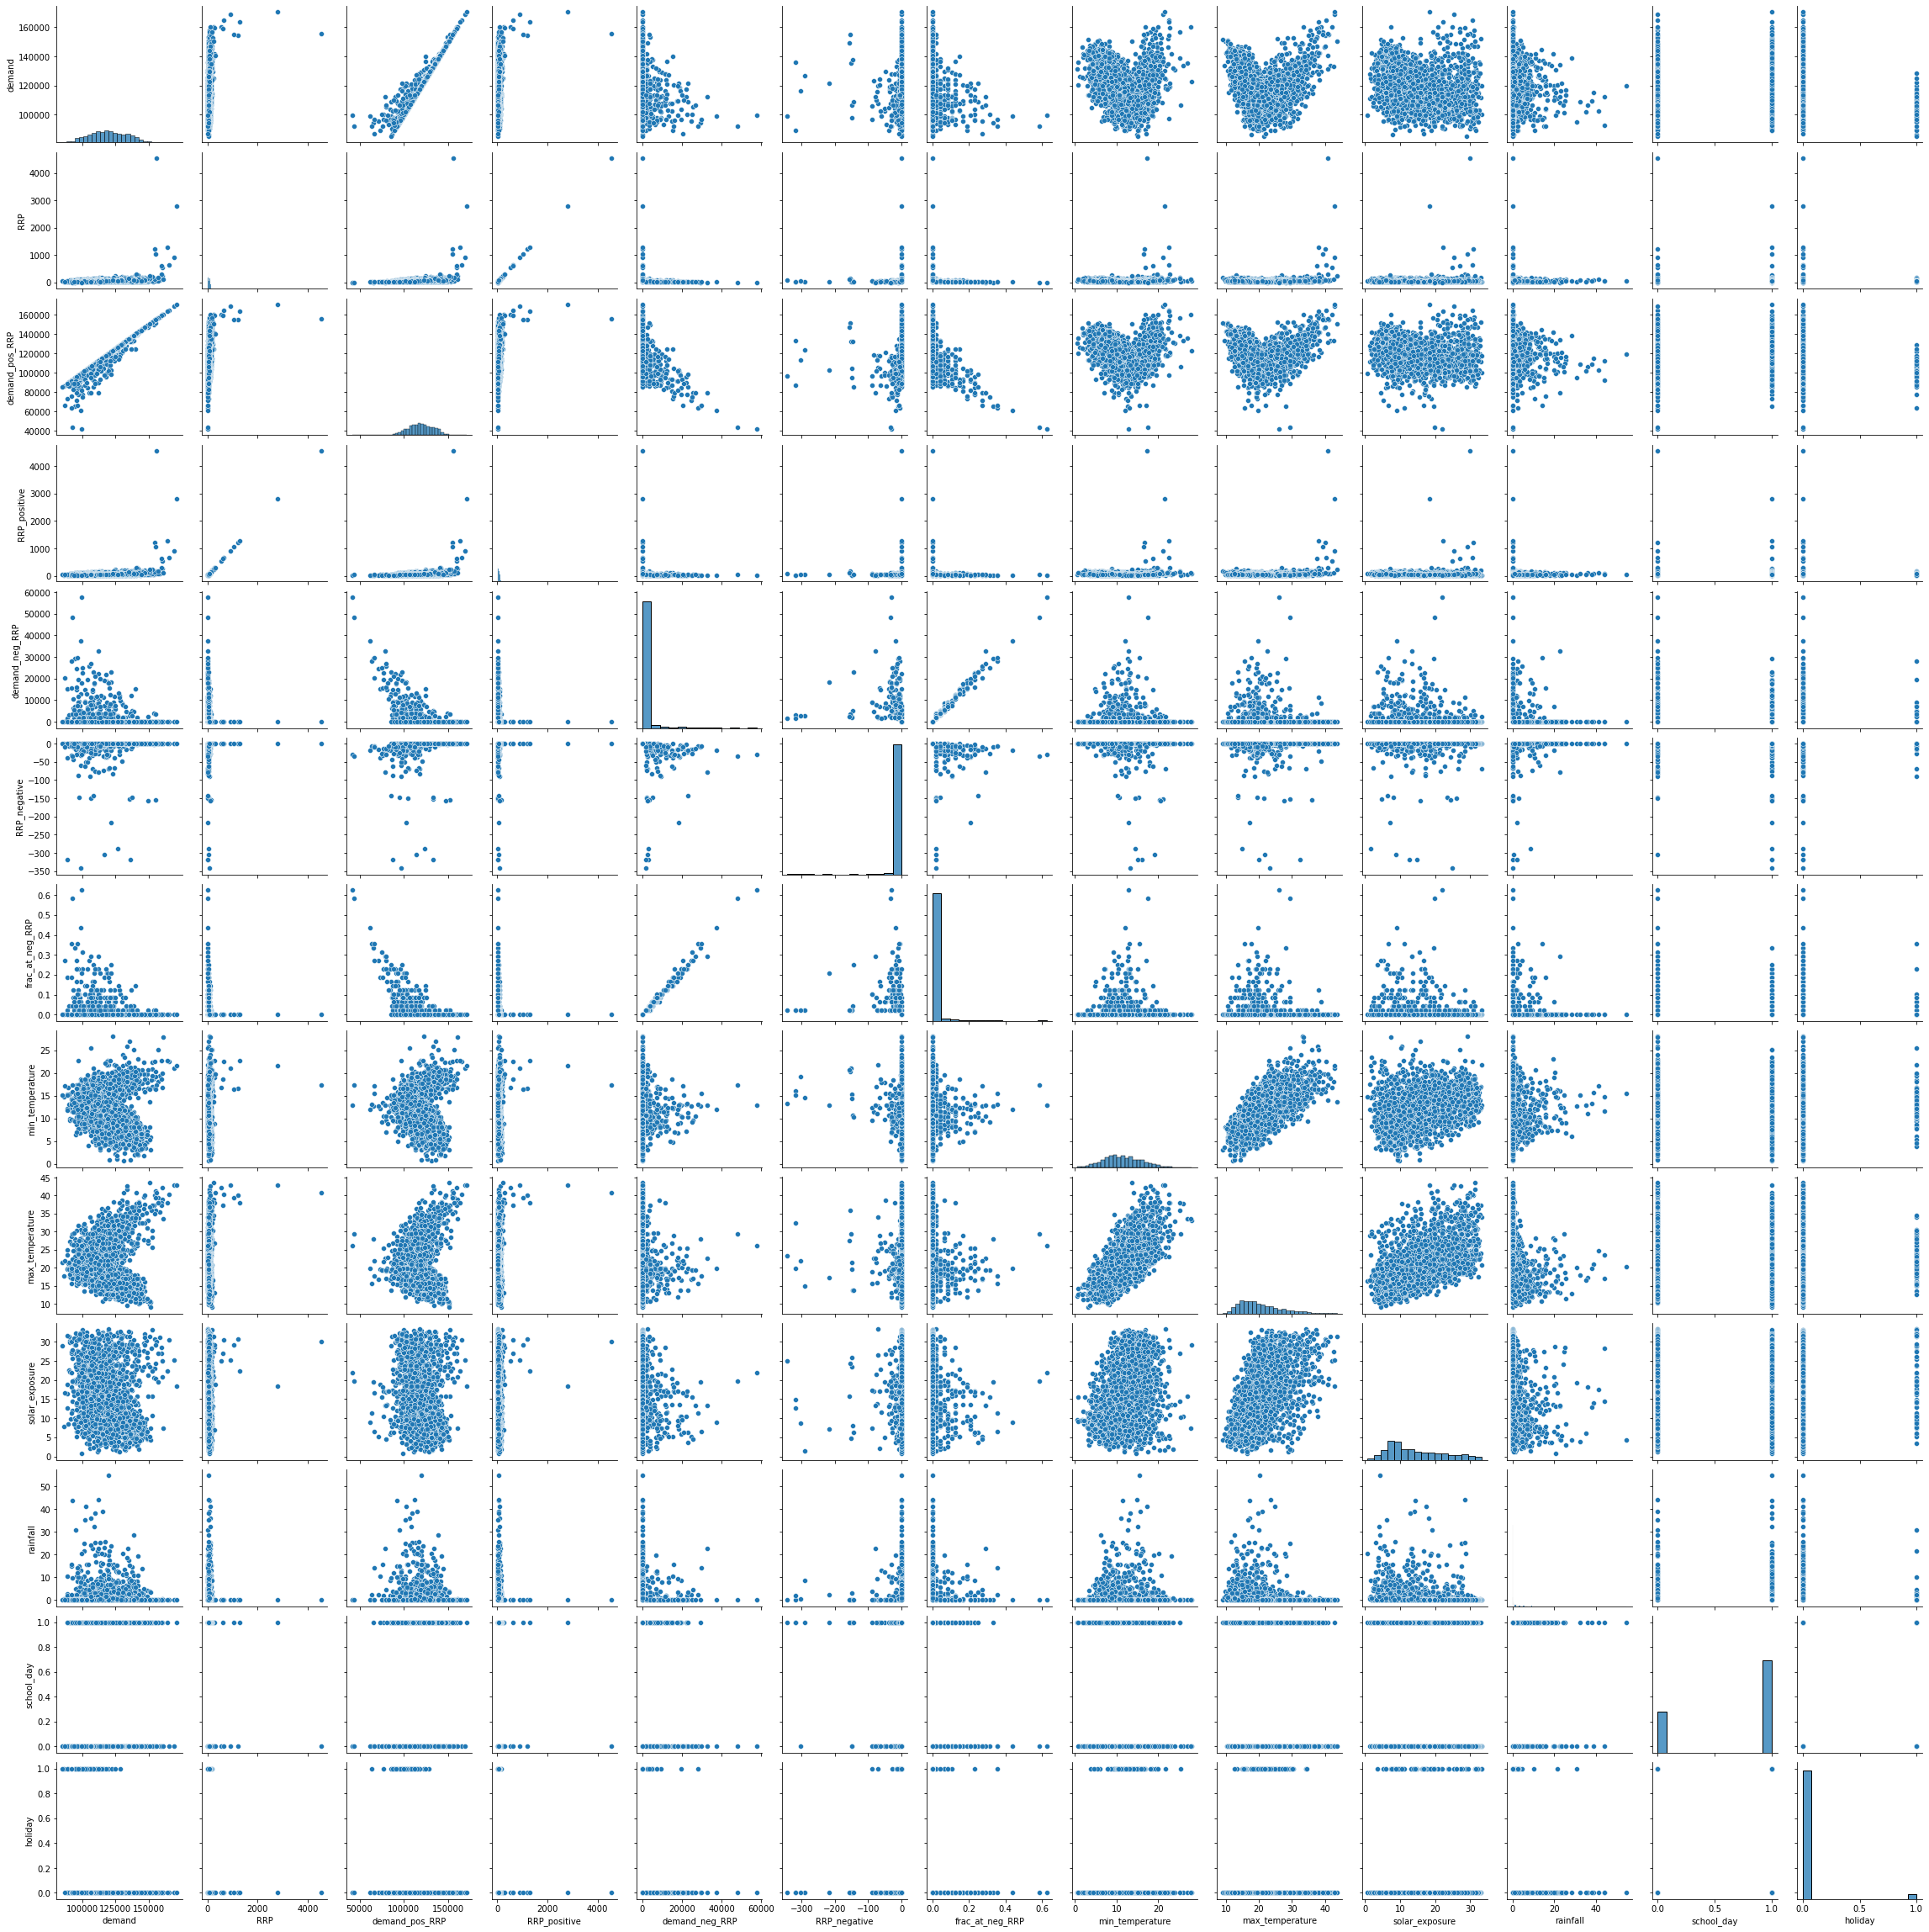

In [8]:
sns.pairplot(df)

Text(0, 0.5, 'Demand')

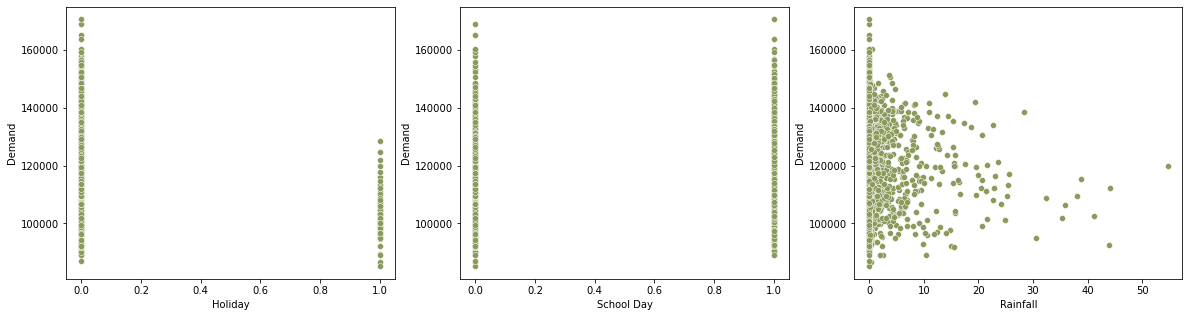

In [9]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='holiday', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Holiday')
plt.ylabel('Demand')

plt.subplot(1, 3, 2)
sns.scatterplot(x='school_day', y='demand', data=df, color='#8A9A5B')
plt.xlabel('School Day')
plt.ylabel('Demand')

plt.subplot(1, 3, 3)
sns.scatterplot(x='rainfall', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Rainfall')
plt.ylabel('Demand')

Text(0, 0.5, 'Demand')

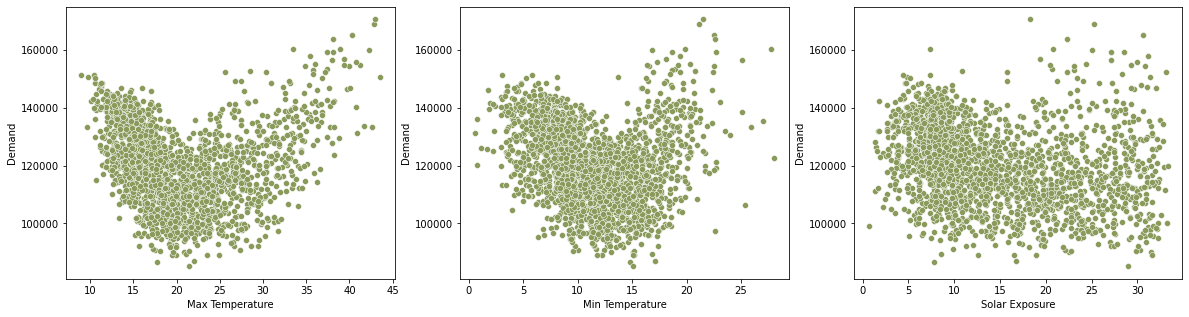

In [10]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='max_temperature', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Max Temperature')
plt.ylabel('Demand')

plt.subplot(1, 3, 2)
sns.scatterplot(x='min_temperature', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Min Temperature')
plt.ylabel('Demand')

plt.subplot(1, 3, 3)
sns.scatterplot(x='solar_exposure', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Solar Exposure')
plt.ylabel('Demand')

In [11]:
print(df['max_temperature'].isnull().sum())
print(df['solar_exposure'].isnull().sum())

0
1


## building MLR

In [12]:
# model1 : multiple linear regression with max temp, min temp, solar exposure, and holiday
ols_object = smf.ols(formula = 'demand~max_temperature+min_temperature+solar_exposure+school_day+holiday+rainfall', data = df)
model1 = ols_object.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     69.28
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           7.03e-79
Time:                        22:15:34   Log-Likelihood:                -22821.
No. Observations:                2102   AIC:                         4.566e+04
Df Residuals:                    2095   BIC:                         4.570e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.234e+05   1095.862    1

Text(0, 0.5, 'Residuals')

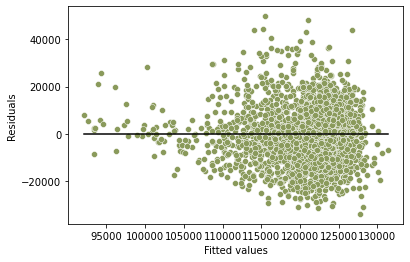

In [13]:
sns.scatterplot(x=model1.fittedvalues, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[model1.fittedvalues.min(), model1.fittedvalues.max()], y=[0,0], color='black')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

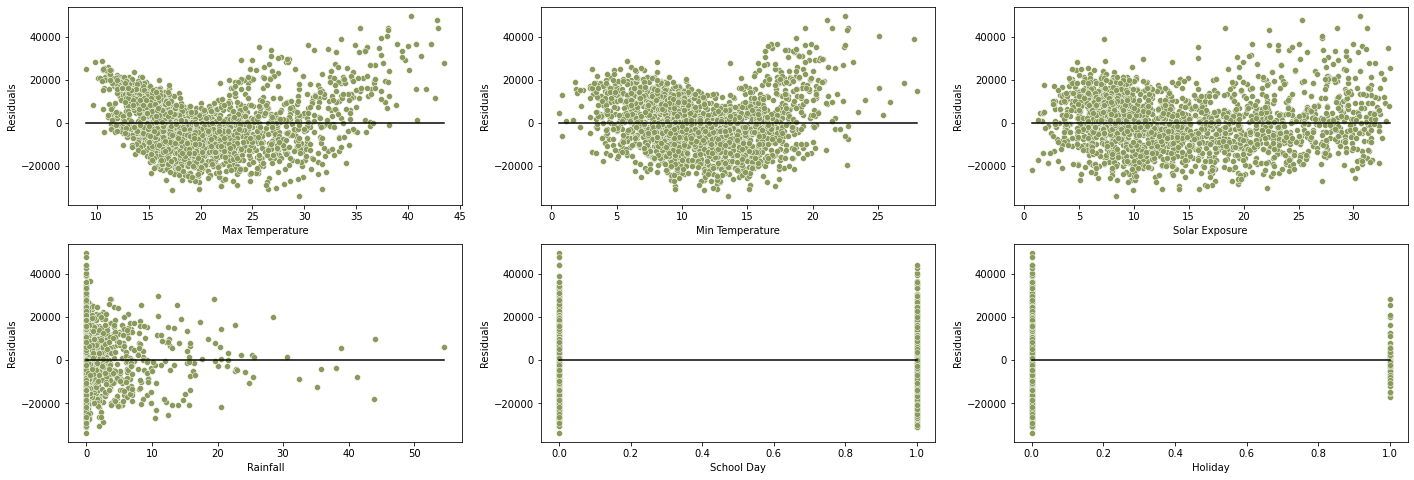

In [14]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x=df.max_temperature, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.max_temperature.min(), df.max_temperature.max()], y=[0,0], color='black')
plt.xlabel('Max Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 2)
sns.scatterplot(x=df.min_temperature, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.min_temperature.min(), df.min_temperature.max()], y=[0,0], color='black')
plt.xlabel('Min Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 3)
sns.scatterplot(x=df.solar_exposure, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.solar_exposure.min(), df.solar_exposure.max()], y=[0,0], color='black')
plt.xlabel('Solar Exposure')
plt.ylabel('Residuals')

plt.subplot(2, 3, 4)
sns.scatterplot(x=df.rainfall, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.rainfall.min(), df.rainfall.max()], y=[0,0], color='black')
plt.xlabel('Rainfall')
plt.ylabel('Residuals')

plt.subplot(2, 3, 5)
sns.scatterplot(x=df.school_day, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.school_day.min(), df.school_day.max()], y=[0,0], color='black')
plt.xlabel('School Day')
plt.ylabel('Residuals')

plt.subplot(2, 3, 6)
sns.scatterplot(x=df.holiday, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.holiday.min(), df.holiday.max()], y=[0,0], color='black')
plt.xlabel('Holiday')
plt.ylabel('Residuals')

### model1 conclusions:
- y heteroscedastic
- max temperature quadratic
- min temperature quadratic

In [15]:
# model2 : np.log(y) to resovle heterscedasticity
ols_object = smf.ols(formula = 'np.log(demand)~max_temperature+I(max_temperature**2)+min_temperature+I(min_temperature**2)+solar_exposure+I(solar_exposure**2)+school_day+holiday+rainfall', data = df)
model2 = ols_object.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(demand)   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     222.0
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          7.10e-297
Time:                        22:15:35   Log-Likelihood:                 2270.5
No. Observations:                2102   AIC:                            -4521.
Df Residuals:                    2092   BIC:                            -4465.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Text(0, 0.5, 'Residuals')

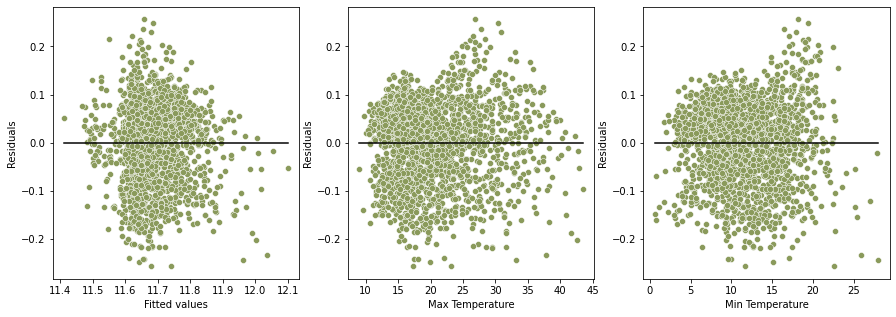

In [16]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=model2.fittedvalues, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[model2.fittedvalues.min(), model2.fittedvalues.max()], y=[0,0], color='black')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df.max_temperature, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.max_temperature.min(), df.max_temperature.max()], y=[0,0], color='black')
plt.xlabel('Max Temperature')
plt.ylabel('Residuals')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df.min_temperature, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.min_temperature.min(), df.min_temperature.max()], y=[0,0], color='black')
plt.xlabel('Min Temperature')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

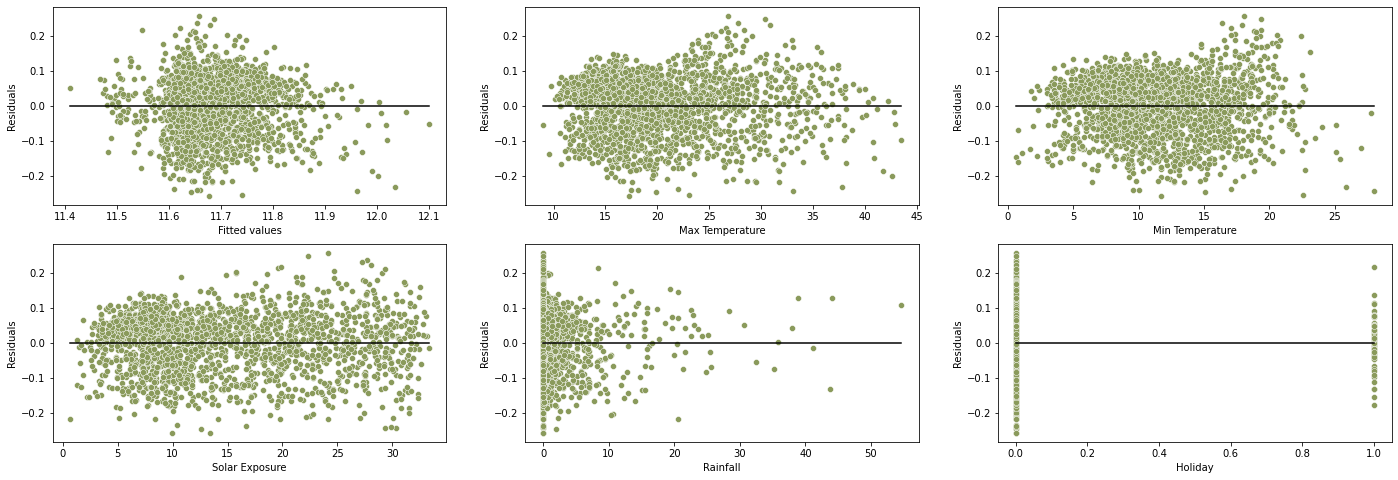

In [17]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x=model2.fittedvalues, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[model2.fittedvalues.min(), model2.fittedvalues.max()], y=[0,0], color='black')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.subplot(2, 3, 2)
sns.scatterplot(x=df.max_temperature, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.max_temperature.min(), df.max_temperature.max()], y=[0,0], color='black')
plt.xlabel('Max Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 3)
sns.scatterplot(x=df.min_temperature, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.min_temperature.min(), df.min_temperature.max()], y=[0,0], color='black')
plt.xlabel('Min Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 4)
sns.scatterplot(x=df.solar_exposure, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.solar_exposure.min(), df.solar_exposure.max()], y=[0,0], color='black')
plt.xlabel('Solar Exposure')
plt.ylabel('Residuals')

plt.subplot(2, 3, 5)
sns.scatterplot(x=df.rainfall, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.rainfall.min(), df.rainfall.max()], y=[0,0], color='black')
plt.xlabel('Rainfall')
plt.ylabel('Residuals')

plt.subplot(2, 3, 6)
sns.scatterplot(x=df.holiday, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.holiday.min(), df.holiday.max()], y=[0,0], color='black')
plt.xlabel('Holiday')
plt.ylabel('Residuals')

### model 2 conclusions: 
- R-squared significantly better
- residual plots indicate that linear assumptions have been satisfied

## autocorrelation

Text(0, 0.5, 'Demand')

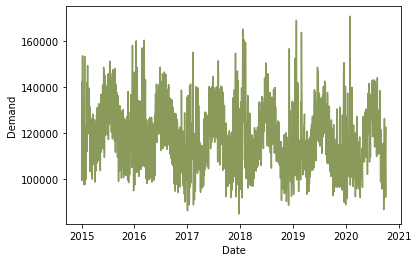

In [69]:
sns.lineplot(x='date', y='demand', data=df, color = '#8A9A5B')
plt.xlabel('Date')
plt.ylabel('Demand')

In [19]:
# functions for autocorrelation
import numpy.ma as ma
from scipy.stats.stats import pearsonr, normaltest
from scipy.spatial.distance import correlation

def build_model(features):
    X=sm.add_constant(df[df['date']<date][features])
    y=df[df['date']<date]['demand']
    model = sm.OLS(y, X, missing='drop').fit()
    predictions = model.predict(X)
    res = y-predictions
    return model, res

def plt_residual(res):
    plt.plot(range(len(res)), res, color = '#8A9A5B') 
    plt.ylabel('Residual')
    plt.xlabel('Day')

def plt_residual_lag(res, nlag):
    x=res.values
    y=res.shift(nlag).values
    sns.kdeplot(x,y=y,color='blue',shade=True )
    plt.xlabel('res')
    plt.ylabel("res-lag-{}".format(nlag))
    rho,p=corrcoef(x,y)
    plt.title("n_lag={} hours, correlation={:f}".format(nlag, rho))
    
def plt_acf(res):
    plt.rcParams['figure.figsize'] = [18, 5]
    acorr = sm.tsa.acf(res.dropna(), nlags = len(res.dropna())-1)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(acorr)
    ax1.set_ylabel('corr')
    ax1.set_xlabel('n_lag')
    ax1.set_title('Auto Correlation')
    ax2.plot(acorr[:4*7])
    ax2.set_ylabel('corr')
    ax2.set_xlabel('n_lag')
    ax2.set_title('Auto Correlation (4-week zoomed in) ')
    plt.show()
    pd.set_option('display.max_columns', None)
    adf=pd.DataFrame(np.round(acorr[:30], 2).reshape([30, 1] ))
    adf.index.name='day'
    display(adf)
    plt.rcParams['figure.figsize'] = [9, 5]

def corrcoef(x,y):
    a,b=ma.masked_invalid(x),ma.masked_invalid(y)
    msk = (~a.mask & ~b.mask)
    return pearsonr(x[msk],y[msk])[0], normaltest(res, nan_policy='omit')[1]

In [74]:
df['demand'] = np.log(df['demand'])
df['max_temperature_squared'] = (df['max_temperature'])**2
df['min_temperature_squared'] = (df['min_temperature'])**2
df['solar_exposure_squared'] = (df['solar_exposure'])**2

In [75]:
df.at[1060, 'solar_exposure']=0

In [76]:
df.at[161, 'rainfall']=0

In [77]:
df.at[1377, 'rainfall']=0

In [78]:
df.at[1378, 'rainfall']=0

In [138]:
base_vars = ['max_temperature', 'max_temperature_squared', 'min_temperature', 'min_temperature_squared', 'solar_exposure', 'solar_exposure_squared', 'holiday', 'rainfall']

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df[base_vars]
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                   feature         VIF
0                    const  127.145069
1          max_temperature   49.256318
2  max_temperature_squared   42.765750
3          min_temperature   23.464869
4  min_temperature_squared   22.447296
5           solar_exposure    1.664413
6                  holiday    1.012229
7                 rainfall    1.056665


### vif conclusions:
- max_temperature, max_temperature_squared, min_temperature, and min_temperature_squared have high vif — makes sense since _temperature_squared was dervied from _temperature

Text(0, 0.5, 'Studentized Residuals')

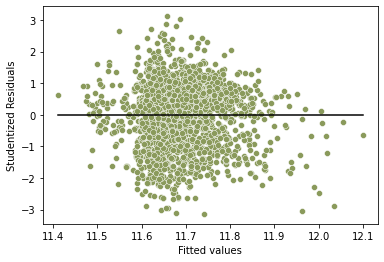

In [27]:
out = model2.outlier_test()

sns.scatterplot(x = (model2.fittedvalues), y=(out.student_resid), color = '#8A9A5B')
sns.lineplot(x = [model2.fittedvalues.min(), model2.fittedvalues.max()], y = [0,0], color = 'black')
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residuals')

In [141]:
np.sum((np.abs(out.student_resid)>3))

6

In [43]:
from datetime import date, timedelta

sdate = date(2019,1,1)
edate = date(2020,1,1)
all_dates = pd.date_range(sdate, edate-timedelta(days=1), freq='d')

In [146]:
def get_rmse(lags):
    predictions = pd.DataFrame()
    sse = 0
    for date in all_dates:
        model, residuals = build_model(base_vars+lags)
        subset = df[df['date'] == date]
        temp = model.predict(sm.add_constant(subset[base_vars+lags], has_constant='add'))
        sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
        predictions = pd.concat([predictions, temp]) 
        
    model, residuals = build_model(base_vars+lags)
    print(model.summary())
    plt_residual(residuals)  
    
    return np.sqrt(sse/365), predictions

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     334.5
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:33:25   Log-Likelihood:                 2260.2
No. Observations:                1823   AIC:                            -4500.
Df Residuals:                    1813   BIC:                            -4445.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     177.9
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          1.18e-241
Time:                        23:33:39   Log-Likelihood:                 1943.4
No. Observations:                1820   AIC:                            -3867.
Df Residuals:                    1810   BIC:                            -3812.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,day_lag,rmse
0,1,8095.223406
1,2,9296.318270
2,3,9338.404791
3,4,9311.806253
4,5,9211.377980
5,6,8835.016872


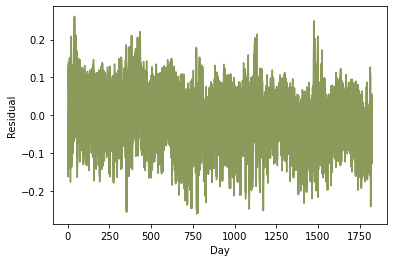

In [143]:
lags = []
days = []
rmses = []
for num in np.arange(1, 7, 1):
    var_name = 'demand_lag_' + str(num) + '_day'
    df[var_name] = df['demand'].shift(num)
    
    days.append(num)
    rmses.append(get_rmse([var_name]))
    
lag_models = pd.DataFrame({'day_lag':days , 'rmse':rmses})
lag_models

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     444.7
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:33:54   Log-Likelihood:                 2426.6
No. Observations:                1817   AIC:                            -4833.
Df Residuals:                    1807   BIC:                            -4778.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     348.7
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:34:08   Log-Likelihood:                 2264.3
No. Observations:                1796   AIC:                            -4509.
Df Residuals:                    1786   BIC:                            -4454.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,day_lag,rmse
0,7,8106.815147
1,14,8095.303520
2,21,8357.269220
3,28,8883.598238


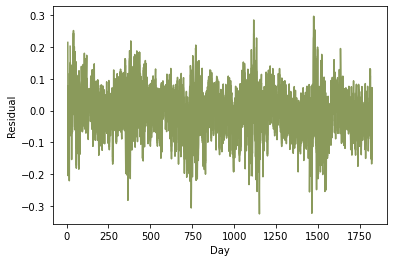

In [144]:
lags = []
days = []
rmses = []
for num in np.arange(7, 29, 7):
    var_name = 'demand_lag_' + str(num) + '_day'
    lags.append(var_name)
    df[var_name] = df['demand'].shift(num)
    
    days.append(num)
    rmses.append(get_rmse([var_name]))
    
lag_models = pd.DataFrame({'day_lag':days , 'rmse':rmses})
lag_models

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     561.9
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:35:01   Log-Likelihood:                 2709.1
No. Observations:                1810   AIC:                            -5394.
Df Residuals:                    1798   BIC:                            -5328.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Text(0, 0.5, 'Predicted Demand')

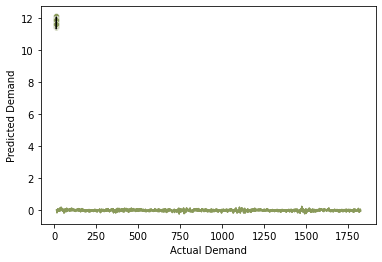

In [147]:
lags = []
days = []
rmses = []
for num in [1, 7, 14]:
    var_name = 'demand_lag_' + str(num) + '_day'
    lags.append(var_name)
    df[var_name] = df['demand'].shift(num)
    
model, residuals = build_model(base_vars+lags)
rmse, predictions = get_rmse(lags)
print(rmse)
plt_residual(residuals)

sns.scatterplot(x=df['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     482.1
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:35:05   Log-Likelihood:                 2539.6
No. Observations:                1810   AIC:                            -5057.
Df Residuals:                    1799   BIC:                            -4997.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Text(0, 0.5, 'Predicted Demand')

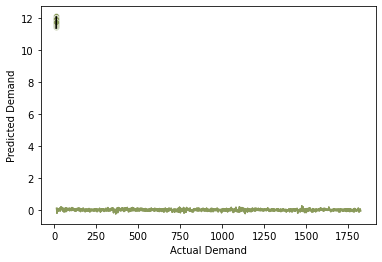

In [148]:
lags = []
days = []
rmses = []
for num in [1, 14]:
    var_name = 'demand_lag_' + str(num) + '_day'
    lags.append(var_name)
    df[var_name] = df['demand'].shift(num)
    
model, residuals = build_model(base_vars+lags)
rmse, predictions = get_rmse(lags)
print(model.summary())
print(rmse)
plt_residual(residuals)

sns.scatterplot(x=df['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

In [149]:
predictions = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(base_vars)
    subset = df[df['date'] == date]
    temp = model.predict(sm.add_constant(subset[base_vars], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions = pd.concat([predictions, temp]) 

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          2.28e-244
Time:                        23:36:28   Log-Likelihood:                 1948.6
No. Observations:                1824   AIC:                            -3879.
Df Residuals:                    1815   BIC:                            -3830.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

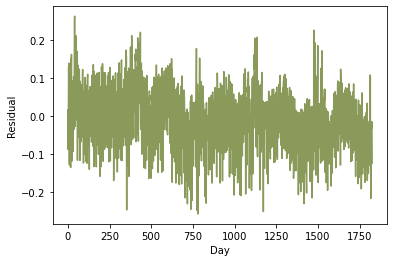

In [150]:
model, residuals = build_model(base_vars)
print(model.summary())
plt_residual(residuals)  

Text(0, 0.5, 'Predicted Demand')

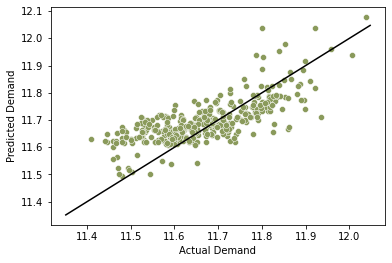

In [151]:
sns.scatterplot(x=df['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')

In [152]:
np.sqrt(sse/365)

9498.586262333303

In [153]:
df['demand_lag_1_day']=df['demand'].shift(1)

predictions = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(base_vars+['demand_lag_1_day'])
    subset = df[df['date'] == date]
    temp = model.predict(sm.add_constant(subset[base_vars+['demand_lag_1_day']], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions = pd.concat([predictions, temp]) 

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     334.5
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:37:31   Log-Likelihood:                 2260.2
No. Observations:                1823   AIC:                            -4500.
Df Residuals:                    1813   BIC:                            -4445.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

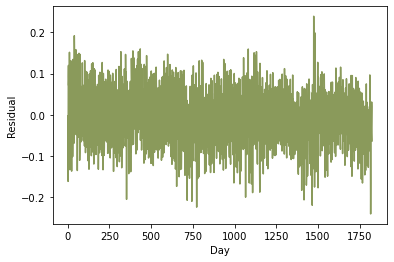

In [154]:
model, residuals = build_model(base_vars+['demand_lag_1_day'])
print(model.summary())
plt_residual(residuals)

Text(0, 0.5, 'Predicted Demand (Log)')

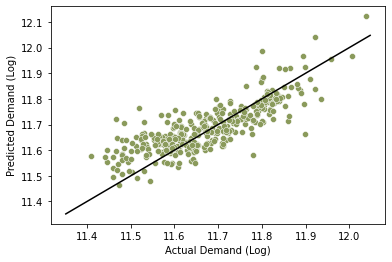

In [156]:
sns.scatterplot(x=df['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand (Log)')
plt.ylabel('Predicted Demand (Log)')

In [157]:
np.sqrt(sse/365)

8187.286429330212

In [54]:
df['demand_lag_2_day']=df['demand'].shift(2)

predictions = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(base_vars+['demand_lag_1_day', 'demand_lag_2_day'])
    subset = df[df['date'] == date]
    temp = model.predict(sm.add_constant(subset[base_vars+['demand_lag_1_day', 'demand_lag_2_day']], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions = pd.concat([predictions, temp]) 

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     383.2
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:23:25   Log-Likelihood:                 2339.4
No. Observations:                1823   AIC:                            -4659.
Df Residuals:                    1813   BIC:                            -4604.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

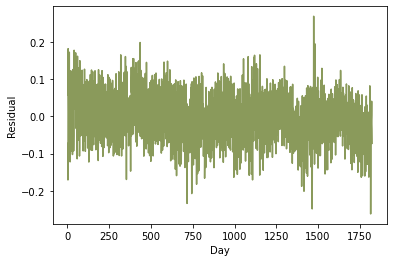

In [131]:
model, residuals = build_model(base_vars+['demand_lag_1_day', 'demand_lag_2_day'])
print(model.summary())
plt_residual(residuals)  

Text(0, 0.5, 'Predicted Demand (Log)')

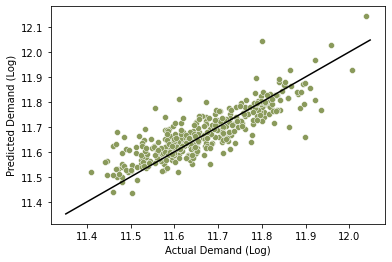

In [130]:
sns.scatterplot(x=df['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand (Log)')
plt.ylabel('Predicted Demand (Log)')

In [57]:
np.sqrt(sse/365)

8081.410429288552

# CHECK

In [158]:
df['demand_lag_1_week']=df['demand'].shift(7)

predictions = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(base_vars + ['demand_lag_1_day', 'demand_lag_1_week'])
    subset = df[df['date'] == date]
    temp = model.predict(sm.add_constant(subset[base_vars + ['demand_lag_1_day', 'demand_lag_1_week']], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions = pd.concat([predictions, temp]) 

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     524.8
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:38:39   Log-Likelihood:                 2603.4
No. Observations:                1817   AIC:                            -5185.
Df Residuals:                    1806   BIC:                            -5124.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

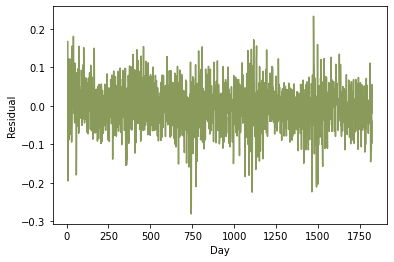

In [159]:
model, residuals = build_model(base_vars+['demand_lag_1_day','demand_lag_1_week'])
print(model.summary())
plt_residual(residuals)

Text(0, 0.5, 'Predicted Demand (Log)')

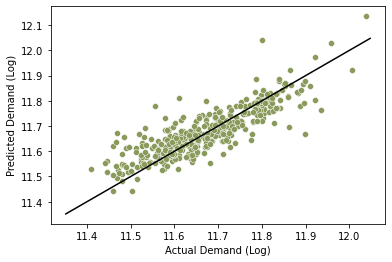

In [160]:
sns.scatterplot(x=df['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand (Log)')
plt.ylabel('Predicted Demand (Log)')

In [161]:
np.sqrt(sse/365)

7373.205525659104

In [162]:
df['demand_lag_2_week']=df['demand'].shift(14)

predictions = pd.DataFrame()
sse = 0
for date in all_dates:
    model, residuals = build_model(base_vars+['demand_lag_1_day', 'demand_lag_1_week', 'demand_lag_2_week'])
    subset = df[df['date'] == date]
    temp = model.predict(sm.add_constant(subset[base_vars+['demand_lag_1_day', 'demand_lag_1_week', 'demand_lag_2_week']], has_constant='add'))
    sse += ((np.exp(subset['demand']) - np.exp(temp.values))**2).sum()
    predictions = pd.concat([predictions, temp])

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     561.9
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:39:49   Log-Likelihood:                 2709.1
No. Observations:                1810   AIC:                            -5394.
Df Residuals:                    1798   BIC:                            -5328.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

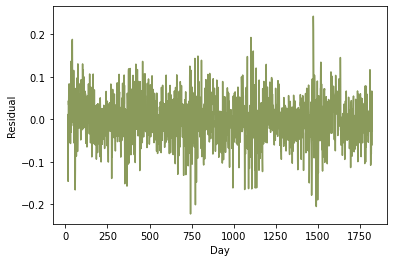

In [163]:
model, residuals = build_model(base_vars+['demand_lag_1_day', 'demand_lag_1_week', 'demand_lag_2_week'])
print(model.summary())
plt_residual(residuals)

Text(0, 0.5, 'Predicted Demand (Log)')

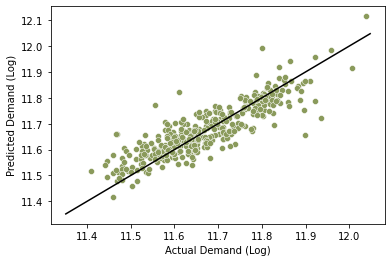

In [165]:
sns.scatterplot(x=df['demand'], y=predictions[0], color = '#8A9A5B')
x_var = np.linspace(min(df['demand']), max(df['demand']))
y_var = x_var
plt.plot(x_var, y_var, color='black')
plt.xlabel('Actual Demand (Log)')
plt.ylabel('Predicted Demand (Log)')

In [166]:
np.sqrt(sse/365)

6997.947785887416